In this notebook I tried to open a Maxar image with rasterio in order calculate NDVI index. 

1. I read the red and nir bands from the metadata (*) 
2. I calculated the index as ( NIR - RED )/ (RED + NIR) 
3. NDVI Index is expected to vary between -1 and 1, instead I found very high values: 
    Maximum element: 25399999.999999996
    Minimum element: 0.0
    NDVI average 113563.44619199625
    
 (*) after analysing the nir index, I realized that it has constant value = 255 . Our GeoTiffs have only one band. 

red shape: (388, 260)
nir shape: (388, 260)


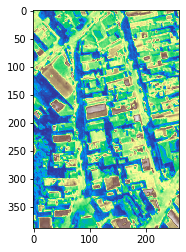

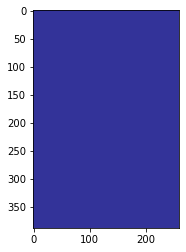

255
255


In [31]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot as rplot

# open the COG image and read the red and NIR bands
with rasterio.open('maxar_2222_132.tif') as src:
    red = src.read(3)
    nir = src.read(4)
    print('red shape:', red.shape)
    print('nir shape:', nir.shape)
    rplot.show(src.read([3]), cmap='terrain')
    rplot.show(src.read([4]), cmap='terrain')
    print(np.min(nir))
    print(np.max(nir))

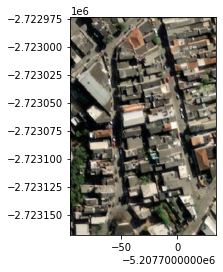

In [33]:
with rasterio.open('maxar_2222_132.tif') as src:
    rplot.show(src, cmap='terrain')

In [17]:
# Get the metadata
meta = src.meta
# Print the metadata
print(meta)
crs = meta['crs']
num_bands = meta['count']
print(crs)
print(num_bands)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 260, 'height': 388, 'count': 4, 'crs': CRS.from_epsg(3857), 'transform': Affine(0.4998185496945898, 0.0, -5207795.381090195,
       0.0, -0.49999955213491254, -2722973.976456554)}
EPSG:3857
4


In [18]:
#Analysis of NDVI array

# Find the maximum and minimum element
max_elem = np.amax(ndvi)
min_elem = np.amin(ndvi)
print("Maximum element:", max_elem)
print("Minimum element:", min_elem)

#find average value 
ndvi_avg = ndvi.mean()
print("NDVI average", ndvi_avg)

# Flatten the array into a 1D array
flat_arr = ndvi.flatten()

# Calculate the histogram of the flattened array
hist, bin_edges = np.histogram(flat_arr)

# Print the frequency of occurrence of each value in the array
for i in range(len(hist)):
    print("Value:", bin_edges[i], "-", bin_edges[i+1], "Frequency:", hist[i])

Maximum element: 25399999.999999996
Minimum element: 0.0
NDVI average 113563.44619199625
Value: 0.0 - 2539999.9999999995 Frequency: 100429
Value: 2539999.9999999995 - 5079999.999999999 Frequency: 0
Value: 5079999.999999999 - 7619999.999999998 Frequency: 0
Value: 7619999.999999998 - 10159999.999999998 Frequency: 0
Value: 10159999.999999998 - 12699999.999999998 Frequency: 0
Value: 12699999.999999998 - 15239999.999999996 Frequency: 0
Value: 15239999.999999996 - 17779999.999999996 Frequency: 0
Value: 17779999.999999996 - 20319999.999999996 Frequency: 0
Value: 20319999.999999996 - 22859999.999999996 Frequency: 0
Value: 22859999.999999996 - 25399999.999999996 Frequency: 451


In [19]:
# save NDVI image as GeoTIFF
meta = src.meta.copy()
meta.update({'count': 1})
with rasterio.open('ndvi.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32), 1)

In [20]:
# open the NDVI image
with rasterio.open('ndvi.tif') as src:
    ndvi = src.read(1)
    ndvi_meta = src.meta

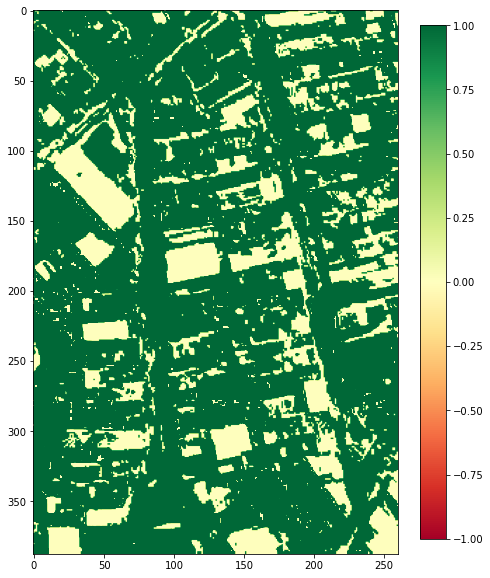

In [21]:
# display the NDVI image with a color scale
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()